# Clustering Assignment

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of 
backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of 
operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide 
how to use this money strategically and effectively. The significant issues that come while making this decision are mostly 
related to choosing the countries that are in the direst need of aid.
And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and 
health factors that determine the overall development of the country. Then you need to suggest the countries which the 
CEO needs to focus on the most.

My job is:-

- To categorise the countries using some socio-economic and health factors that determine the overall development of the country.
- We need to suggest the countries which the CEO needs to focus on the most.

The steps are broadly:

1.  Importing the necessary Package.
2.  Read the data
3.  Clean the data
4.  Visualization of data
5.  EDA
6.  Prepare the data for modelling
7.  Hopkins Statistics Test
8.  Scaling Data 
9.  Modelling
10. Final analysis

# 1. Importing the necessary packages.

In [397]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# 2. Read the data

In [399]:
#reading the dataset
country=pd.read_csv('Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [400]:
# basics of the df checking the shape
# 'shape', gives us the total number of rows and columns in the dataframe.
country.shape

(167, 10)

In [401]:
#checking the missing values
# "info", gives us the total number of non-null entries in each of the columns.
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


Conclusion: There are no missing values present in the dataset.

In [402]:
# describe', gives us a summary of the numerical columns in the dataframe
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# 3. Clean the data

In [403]:
#basic missing value check
country.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Inference:

- There are no missing values hence no imputation or drop required.

In [404]:
# Datatype check for the dataframe
country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

### Inference:

- There is no inconsistent data types and hence no conversion is required.

In [405]:
# Duplicates check
country.loc[country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


### Inference:
- There is no duplicate values and hence no drop is required.

#### We need to convert imports,exports and health spending from percentage values to actual values of their GDP per capita. Because the percentage values don't give a clear picture of that country. For example, afghanistan and albania have similar imports percentange but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.

In [406]:
# Converting exports,imports and health spending percentages to its absolute values.
country['exports']=(country['exports']*country['gdpp'])/100
country['imports']=(country['imports']*country['gdpp'])/100
country['health']=(country['health']*country['gdpp'])/100
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# 4. Visualization of the data

### Checking the coorelations between the variables

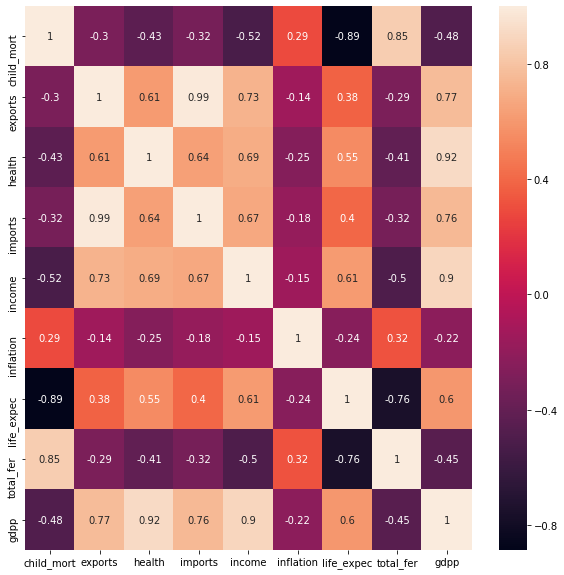

In [407]:
plt.figure(figsize=(10,10))
sns.heatmap(country.corr(),annot=True)
plt.show()

### Inference:
- imports and exports are highly correlated with correlation of 0.99
- health and gdpp are highly correlated with correlation of 0.92
- income and gdpp are highly correlated with correlation of 0.9
- child_mortality and life_expentency are highly correlated with correlation of -0.89
- child_mortality and total_fertility are highly correlated with correlation of 0.85
- gdpp and exports are highly correlated with correlation of 0.77
- gdpp and imports are highly correlated with correlation of 0.76
- life_expentency and total_fertility are highly correlated with correlation of -0.76
- income and exports are highly correlated with correlation of 0.73

# 5. Exploratory Data Analysis

# Univariate Analysis:-


We are required to choose the countries that are in the direst need of aid. Therefore, we need to identify those countries which are using some socio-economic and health factors, that determine the overall development of the country.

We will look for lowest 10 countries for each factor.

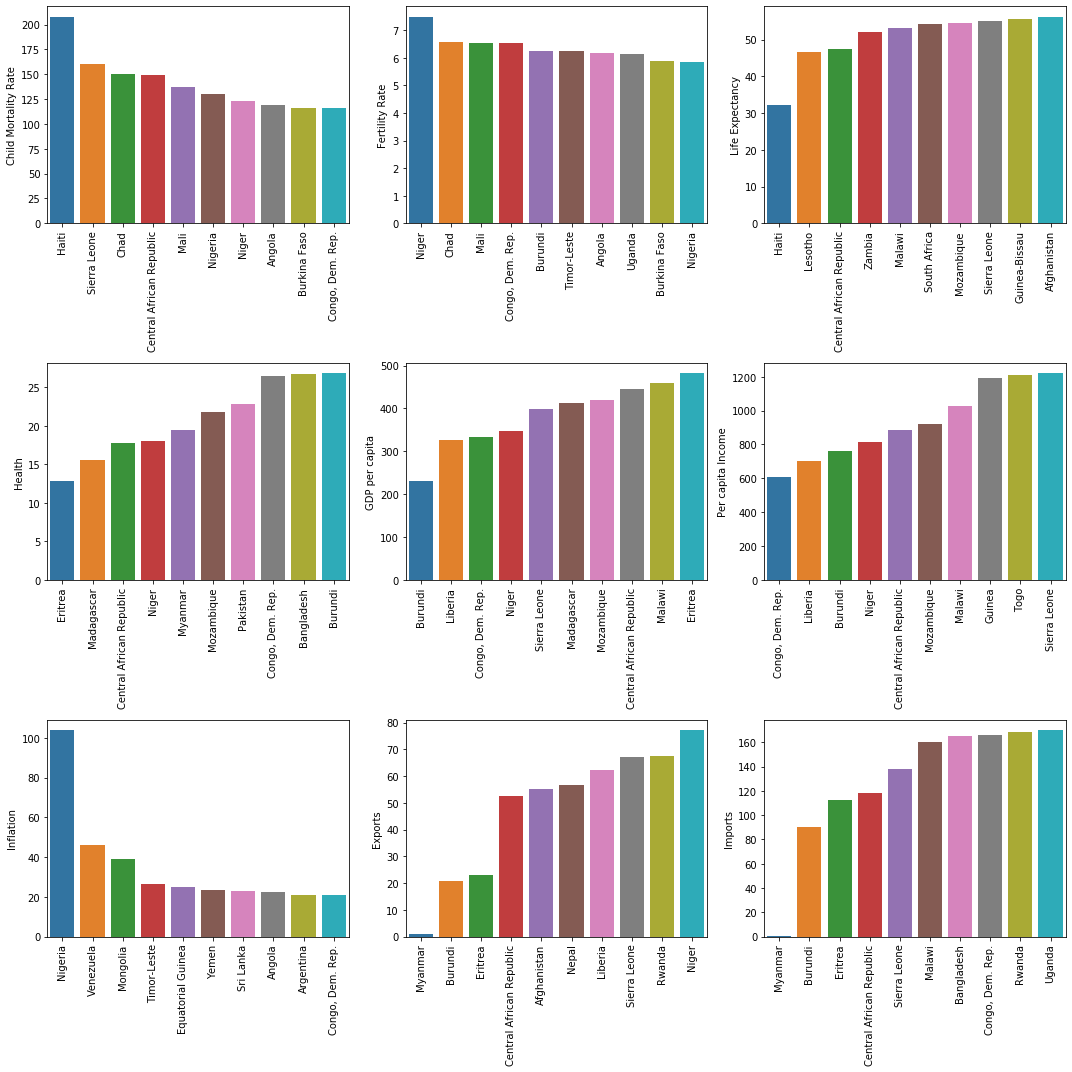

In [408]:
#Boxplot of all the columns with country column
fig, axs = plt.subplots(3,3,figsize = (15,15))

top10_child_mort = country[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

top10_total_fer = country[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

bottom10_life_expec = country[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

bottom10_health = country[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')


bottom10_gdpp = country[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

bottom10_income = country[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


top10_inflation = country[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')

bottom10_exports = country[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')

bottom10_imports = country[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

# Bi-variate Analysis (Numerical-Numerical)

Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

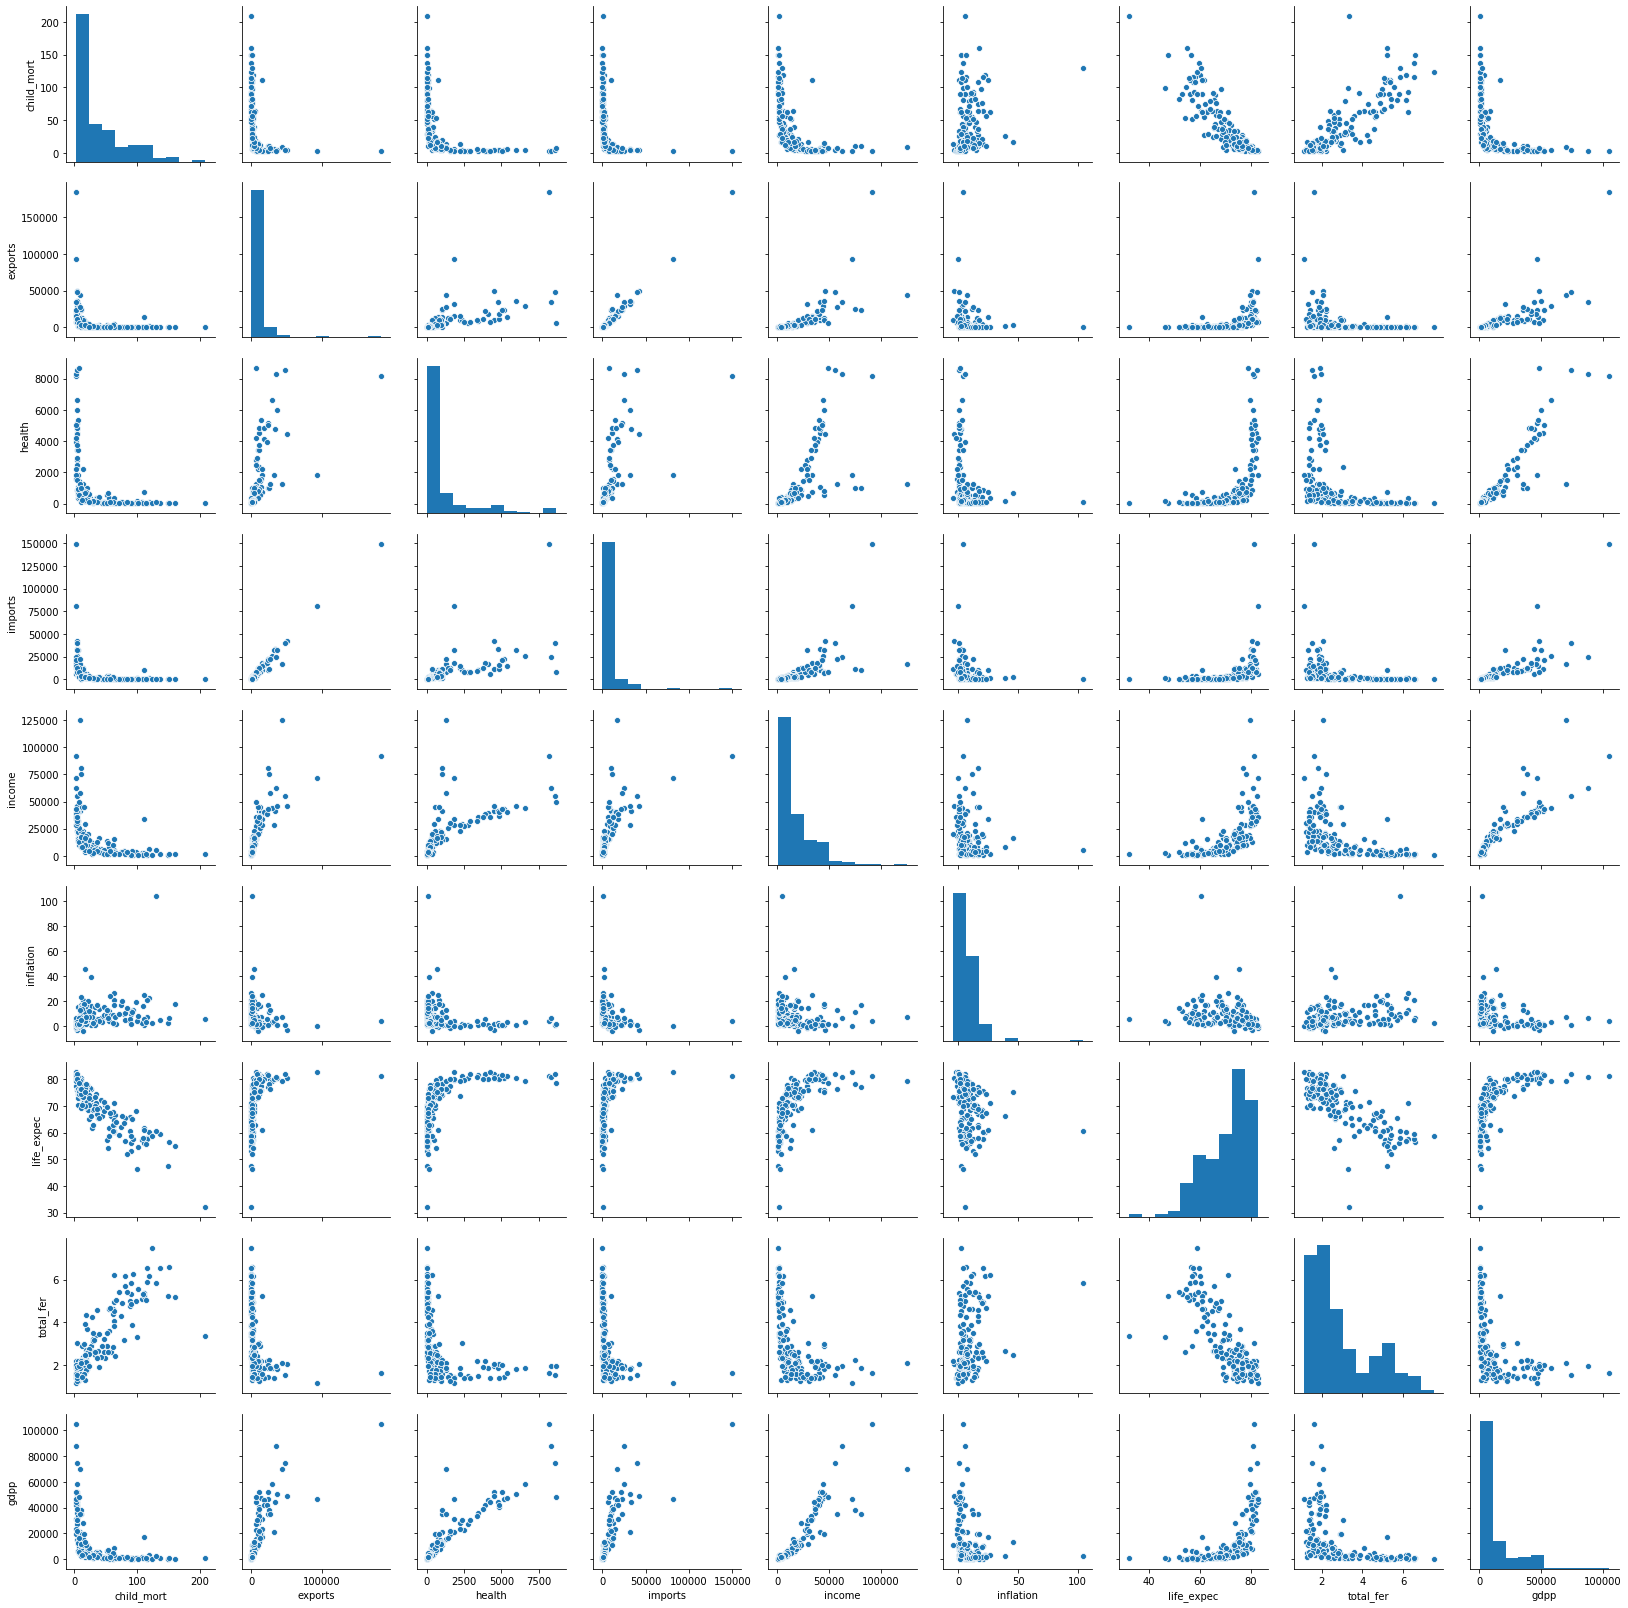

In [409]:
num_var=country[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

sns.pairplot(num_var)
plt.show()

# 6. Prepare the data for modelling

In [410]:
# Before manipulating data, we will save one copy of orignal data.
country_data= country.copy()
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [411]:
country_data.shape

(167, 10)

###   Outlier Analysis

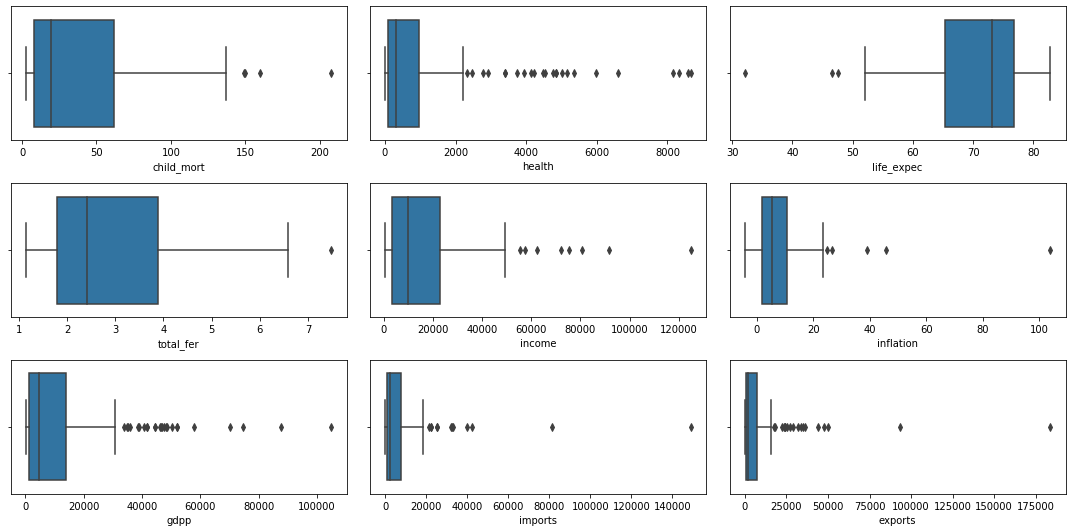

In [412]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(country_data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(country_data['health'], ax = axs[0,1])
plt3 = sns.boxplot(country_data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(country_data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(country_data['income'], ax = axs[1,1])
plt6 = sns.boxplot(country_data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(country_data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(country_data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(country_data['exports'], ax = axs[2,2])
plt.tight_layout()


In [413]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [414]:
country_data.shape

(167, 10)

### Outlier Treatment

As we can see there are a number of outliers in the data.

Keeping in mind we need to identify backward countries based on socio economic and health factors.
We will cap the outliers to values accordingly for analysis.

### Capping the outliers method used

In [415]:
# capping (statistical) the outliers
# outlier treatment for child_mort
Q1 = country_data.child_mort.quantile(0.01)
Q4 = country_data.child_mort.quantile(0.99)
country_data['child_mort'][country_data['child_mort'] <= Q1] = Q1
country_data['child_mort'][country_data['child_mort'] >= Q4] = Q4


# outlier treatment for exports
Q1 = country_data.exports.quantile(0.01)
Q4 = country_data.exports.quantile(0.99)
country_data['health'][country_data['health'] <= Q1] = Q1
country_data['health'][country_data['health'] >= Q4] = Q4

# outlier treatment for life_expec
Q1 = country_data.life_expec.quantile(0.01)
Q4 = country_data.life_expec.quantile(0.99)
country_data['life_expec'][country_data['life_expec'] <= Q1] = Q1
country_data['life_expec'][country_data['life_expec'] >= Q4] = Q4

# outlier treatment for total_fer
Q1 = country_data.total_fer.quantile(0.01)
Q4 = country_data.total_fer.quantile(0.99)
country_data['total_fer'][country_data['total_fer'] <= Q1] = Q1
country_data['total_fer'][country_data['total_fer'] >= Q4] = Q4

# outlier treatment for income
Q1 = country_data.income.quantile(0.01)
Q4 = country_data.income.quantile(0.99)
country_data['income'][country_data['income'] <= Q1] = Q1
country_data['income'][country_data['income'] >= Q4] = Q4

# outlier treatment for inflation
Q1 = country_data.inflation.quantile(0.01)
Q4 = country_data.inflation.quantile(0.99)
country_data['inflation'][country_data['inflation'] <= Q1] = Q1
country_data['inflation'][country_data['inflation'] >= Q4] = Q4

# outlier treatment for gdpp
Q1 = country_data.gdpp.quantile(0.01)
Q4 = country_data.gdpp.quantile(0.99)
country_data['gdpp'][country_data['gdpp'] <= Q1] = Q1
country_data['gdpp'][country_data['gdpp'] >= Q4] = Q4

# outlier treatment for imports
Q1 = country_data.imports.quantile(0.01)
Q4 = country_data.imports.quantile(0.99)
country_data['imports'][country_data['imports'] <= Q1] = Q1
country_data['imports'][country_data['imports'] >= Q4] = Q4

# outlier treatment for exports
Q1 = country_data.exports.quantile(0.01)
Q4 = country_data.exports.quantile(0.99)
country_data['exports'][country_data['exports'] <= Q1] = Q1
country_data['exports'][country_data['exports'] >= Q4] = Q4

In [416]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [417]:
country_data.shape

(167, 10)

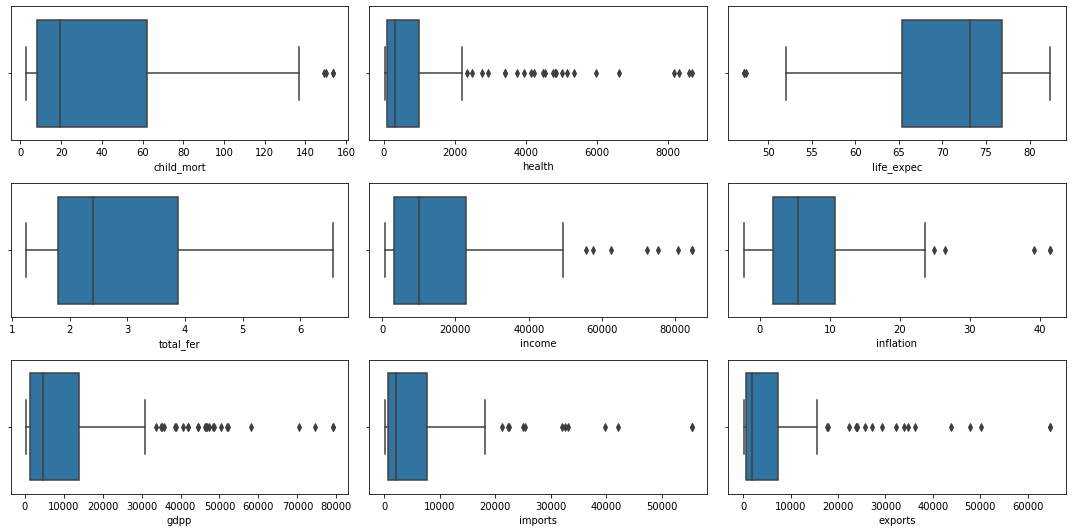

In [418]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(country_data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(country_data['health'], ax = axs[0,1])
plt3 = sns.boxplot(country_data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(country_data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(country_data['income'], ax = axs[1,1])
plt6 = sns.boxplot(country_data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(country_data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(country_data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(country_data['exports'], ax = axs[2,2])

plt.tight_layout()


In [419]:
country_data.shape

(167, 10)

In [420]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

# 7.Hopkins Statistics:

The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [421]:
#Creating a country_hop data frame to find hopkins value
country_hop=country_data[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [422]:
country_hop.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [423]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [424]:
#First convert the numpy array that you have to a dataframe
country_hop.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

In [425]:
country_hop.shape

(167, 9)

In [426]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(country_hop)

0.922970002523424

Inference:
0.92 is a good Hopkins score for Clustering.

# 8. Scaling the Data

In [427]:
rfm_df = country_data[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(167, 9)

In [428]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.565164,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.439335,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.484946,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.532486,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178874,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


# 9. Modelling

# Finding the Optimal Number of Clusters

### Elbow-Curve/SSD to get the right no. of clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

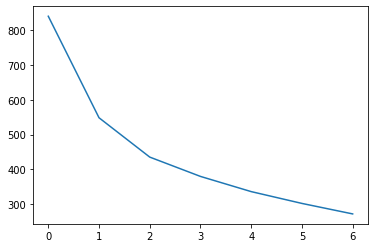

In [429]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7,  8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [448]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4691904548751326
For n_clusters=3, the silhouette score is 0.40696069407925417
For n_clusters=4, the silhouette score is 0.39516613113615756
For n_clusters=5, the silhouette score is 0.3696001191189621
For n_clusters=6, the silhouette score is 0.2814243590064648
For n_clusters=7, the silhouette score is 0.28881689583186215
For n_clusters=8, the silhouette score is 0.29184801498765806


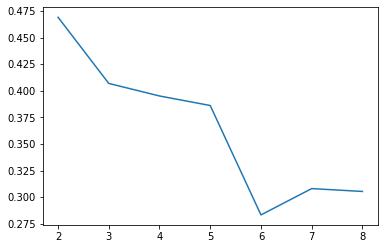

In [449]:
ss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k).fit(rfm_df_scaled)
    ss.append([k, silhouette_score(rfm_df_scaled, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);      

In [450]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [451]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [452]:
# Assign the label to the 'cluster_id' column
country_data['cluster_id'] = kmeans.labels_
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [453]:
country_data['cluster_id'].value_counts()

1    90
0    48
2    29
Name: cluster_id, dtype: int64

### Inference:
It seems there are good number of countries in each clusters.

### From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country.  Hence, we will proceed with cluster profiling by using these 3 variables.
- gdpp: (The GDP per capita) Calculated as the Total GDP divided by the total population. 
- child_mort: Death of children under 5 years of age per 1000 live births.          
- income: Net income per person. 

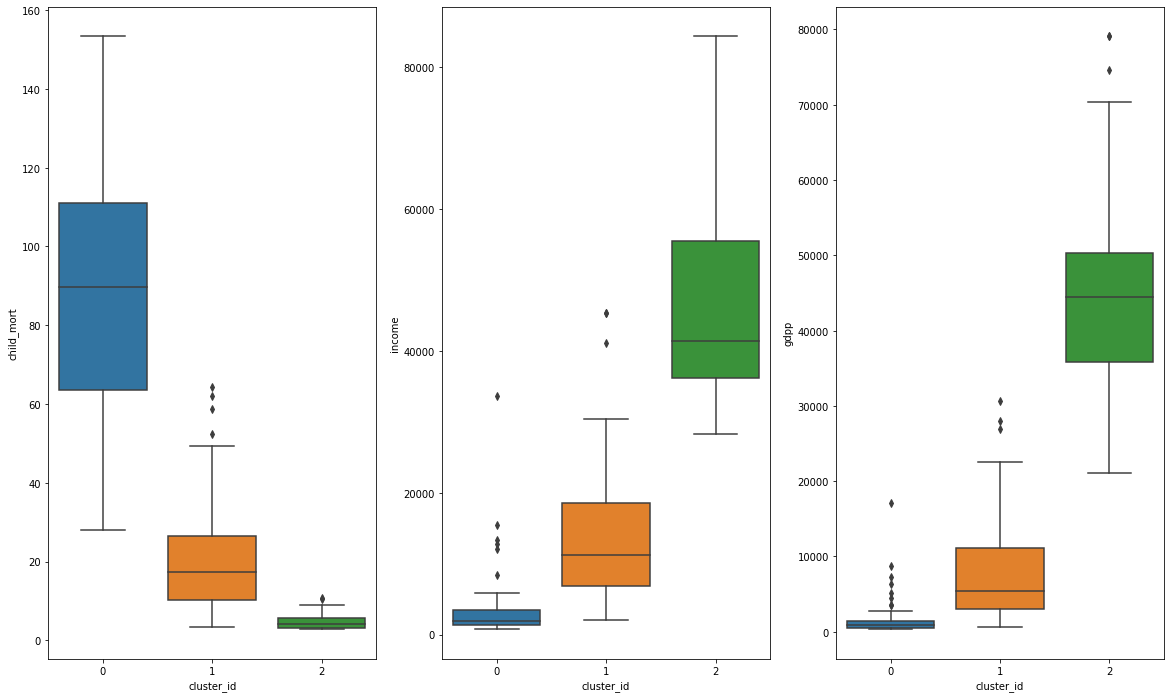

In [454]:
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id', y='child_mort', data=country_data)
plt.subplot(1,3,2)
sns.boxplot(x='cluster_id', y='income', data=country_data)
plt.subplot(1,3,3)
sns.boxplot(x='cluster_id', y='gdpp', data=country_data)
plt.show()

Inference:
-  Cluster 0 has lowest GDPP so we can say that the countries in cluster 0  must be in high Aid.
-  Cluster 0 has lowest income so we can say that the countries in cluster 0  must be in high Aid.
-  Cluster 0 has highest mortality rate so we can say that the countries in cluster 0 must be in high Aid.

## Cluster wise comparison of 'income','gdpp','child_mort'

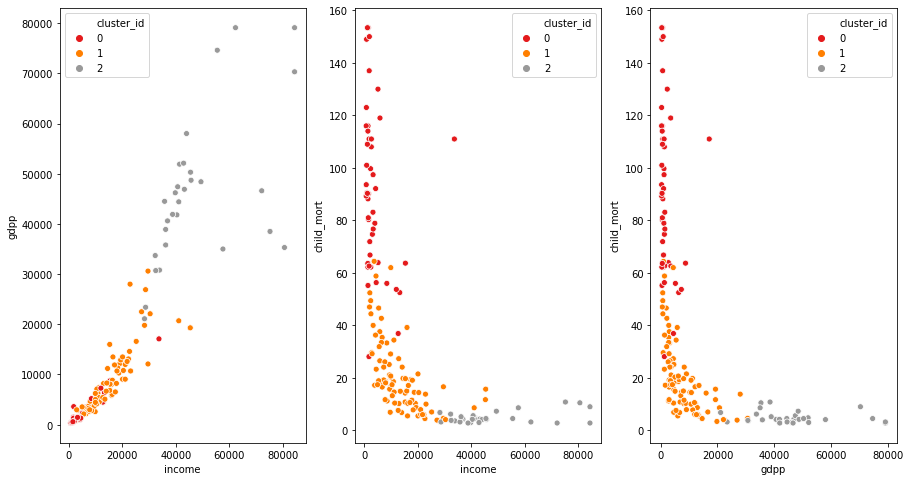

In [455]:
# plotting the cluster ith respect to he clusters obtained
plt.figure(figsize=[15,8])
plt.subplot(1,3,1)
sns.scatterplot(x= 'income', y= 'gdpp', hue='cluster_id', legend='full', data=country_data, palette= 'Set1')
plt.subplot(1,3,2)
sns.scatterplot(x= 'income', y= 'child_mort', hue='cluster_id', legend='full', data=country_data, palette= 'Set1')
plt.subplot(1,3,3)
sns.scatterplot(x= 'gdpp', y= 'child_mort', hue='cluster_id', legend='full', data=country_data, palette= 'Set1')
plt.show()

###  Final Inference:
Child Mortality is highest for Cluster 0, These clusters need some aid.
Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 0. Hence, these countries need some help.

### Cluster profiling

In [456]:
country_data.groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,90.335417,879.097657,115.348635,827.327888,3901.010000,10.608604,59.567083,4.972233,1911.400833
1,20.547778,3477.250726,528.925228,3589.291996,13804.333333,7.131624,73.393333,2.242591,7808.577778
2,4.989655,25405.359310,4253.879655,21316.695862,47784.413793,2.906731,80.453103,1.757352,46068.137931


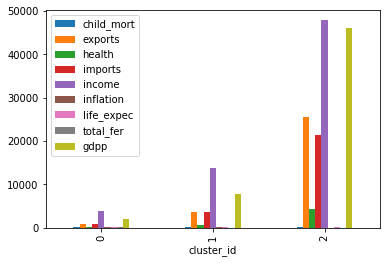

In [457]:
country_data.groupby('cluster_id').mean().plot(kind= 'bar')
plt.show()

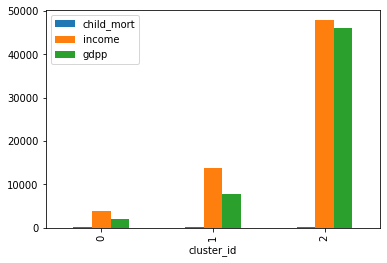

In [458]:
country_data[['child_mort', 'income', 'gdpp', 'cluster_id']].groupby('cluster_id').mean().plot(kind= 'bar')
plt.show()

### Inference:
- Child Mortality is highest for Cluster 0, These clusters need some aid.
- Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 0. Hence, these countries need some help.

### Finding the observations that belong to certain cluster

In [459]:
# let's filter the data with selected cluster
df=country_data[country_data.cluster_id==0]
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


In [488]:
final_list_1=df.sort_values(by=['income', 'gdpp', 'child_mort'], ascending=[True, True, False])
final_list_1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.47,60.8,5.0200,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.80,57.5,6.5400,334.00,0
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.30,57.7,6.2600,331.62,0
112,Niger,123.0,77.256000,22.243716,170.86800,814.00,2.55,58.8,6.5636,348.00,0
31,Central African Republic,149.0,52.628000,22.243716,118.19000,888.00,2.01,47.5,5.2100,446.00,0
106,Mozambique,101.0,131.985000,22.243716,193.57800,918.00,7.64,54.5,5.5600,419.00,0
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.00,12.10,53.1,5.3100,459.00,0
63,Guinea,109.0,196.344000,31.946400,279.93600,1190.00,16.10,58.0,5.3400,648.00,0
150,Togo,90.3,196.176000,37.332000,279.62400,1210.00,1.18,58.7,4.8700,488.00,0
132,Sierra Leone,153.4,67.032000,52.269000,137.65500,1220.00,17.20,55.0,5.2000,399.00,0


In [489]:
final_list_1['country'].head(10)

88                      Liberia
37             Congo, Dem. Rep.
26                      Burundi
112                       Niger
31     Central African Republic
106                  Mozambique
94                       Malawi
63                       Guinea
150                        Togo
132                Sierra Leone
Name: country, dtype: object

In [461]:
# Lets drop the Cluster Id created with 3 clusters and proceed with Hierarchical Clustering.
country_data= country_data.drop(['cluster_id'], axis=1)

# Hierarchical Clustering

In [462]:
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.565164,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.439335,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.484946,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.532486,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178874,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


#### Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. 

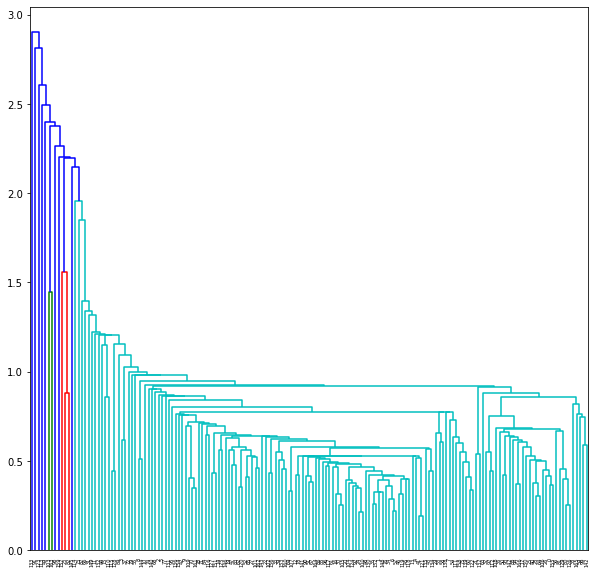

In [463]:
# single linkage
plt.figure(figsize=(10, 10))
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. 

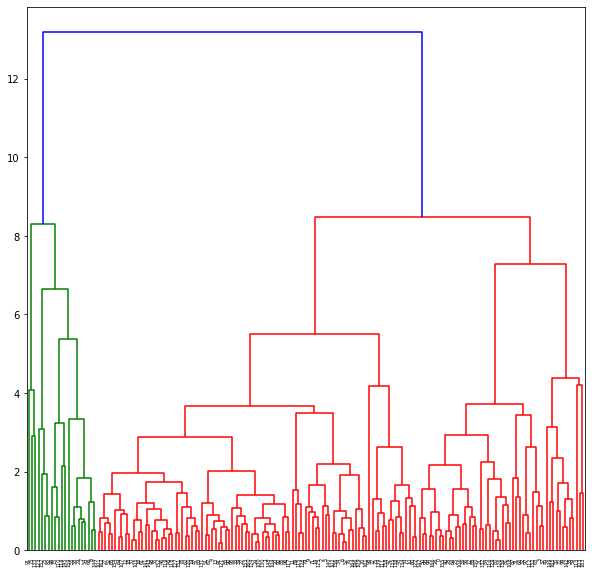

In [464]:
# complete linkage
plt.figure(figsize=(10, 10))
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### Looking at the above dendrogram it is observed that cutting it at n = 3 is most optimum.

In [465]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels 

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [466]:
# assign cluster labels
country_data['cluster_labels1'] = cluster_labels
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels1
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [467]:
country_data['cluster_labels1'].value_counts()

1    96
0    50
2    21
Name: cluster_labels1, dtype: int64

### Inference:
It seems there is improper distribution of countries in each clusters.

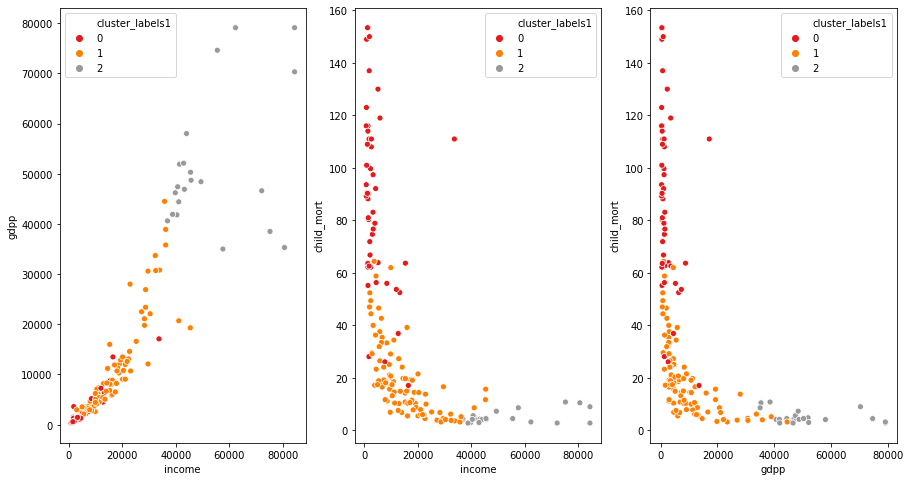

In [468]:
# plotting the cluster ith respect to he clusters obtained
plt.figure(figsize=[15,8])
plt.subplot(1,3,1)
sns.scatterplot(x= 'income', y= 'gdpp', hue='cluster_labels1', legend='full', data=country_data, palette= 'Set1')
plt.subplot(1,3,2)
sns.scatterplot(x= 'income', y= 'child_mort', hue='cluster_labels1', legend='full', data=country_data, palette= 'Set1')
plt.subplot(1,3,3)
sns.scatterplot(x= 'gdpp', y= 'child_mort', hue='cluster_labels1', legend='full', data=country_data, palette= 'Set1')
plt.show()

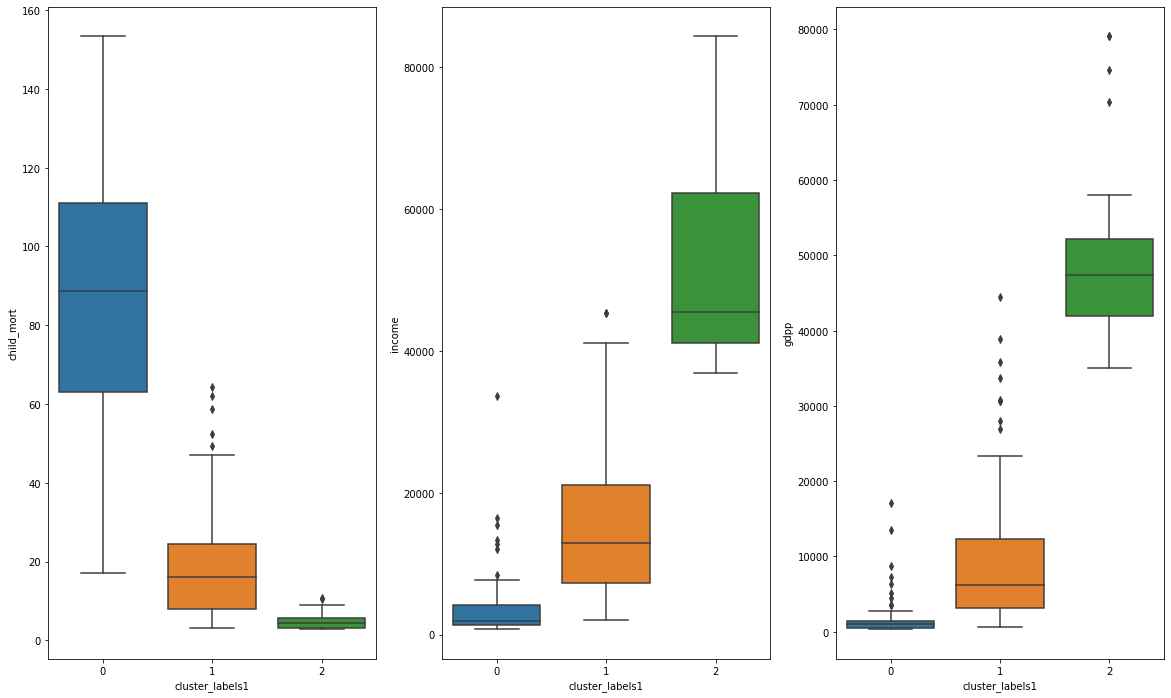

In [469]:
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_labels1', y='child_mort', data=country_data)
plt.subplot(1,3,2)
sns.boxplot(x='cluster_labels1', y='income', data=country_data)
plt.subplot(1,3,3)
sns.boxplot(x='cluster_labels1', y='gdpp', data=country_data)
plt.show()

### Inference:
Child Mortality is highest for Cluster 0. These cluster need some aid.
Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 0. Hence, these countries need some help.

### Cluster profiling

In [470]:
country_data.groupby('cluster_labels1').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_labels1,,,,,,,,,
0,87.586000,945.634750,126.874890,871.805773,4229.169600,11.797820,60.016400,4.875544,2157.944800
1,19.188542,4326.711618,733.118130,4474.111767,15438.333333,5.936460,74.069479,2.181075,9849.187500
2,5.176190,29964.696190,4751.401429,24182.246667,53421.333333,3.598248,80.298571,1.823962,51289.333333


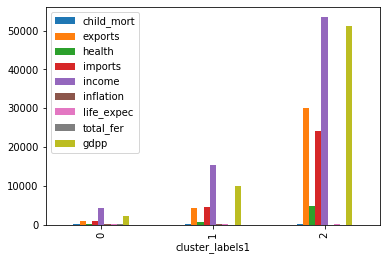

In [471]:
country_data.groupby('cluster_labels1').mean().plot(kind= 'bar')
plt.show()

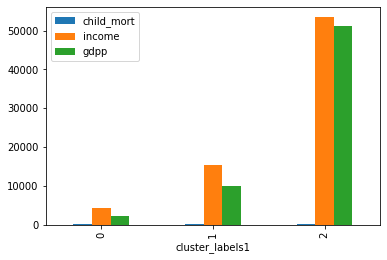

In [472]:
country_data[['child_mort', 'income', 'gdpp', 'cluster_labels1']].groupby('cluster_labels1').mean().plot(kind= 'bar')
plt.show()

### Inference:
Child Mortality is highest for Cluster 0, These clusters need some aid.
Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. However Income per capita and gdpp seems lowest for countries in clusters 0. Hence, countries in cluster 0 need some help.

### Finding the observations that belong to certain cluster

In [473]:
# let's filter the data with selected cluster
df1= country_data[country_data.cluster_labels1==0]
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels1
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


In [474]:
df1.shape

(50, 11)

In [486]:
final_list_2=df1.sort_values(by=['income', 'gdpp', 'child_mort'], ascending=[True, True, False])
final_list_2.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels1
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.47,60.8,5.0200,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.80,57.5,6.5400,334.00,0
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.30,57.7,6.2600,331.62,0
112,Niger,123.0,77.256000,22.243716,170.86800,814.00,2.55,58.8,6.5636,348.00,0
31,Central African Republic,149.0,52.628000,22.243716,118.19000,888.00,2.01,47.5,5.2100,446.00,0
106,Mozambique,101.0,131.985000,22.243716,193.57800,918.00,7.64,54.5,5.5600,419.00,0
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.00,12.10,53.1,5.3100,459.00,0
63,Guinea,109.0,196.344000,31.946400,279.93600,1190.00,16.10,58.0,5.3400,648.00,0
150,Togo,90.3,196.176000,37.332000,279.62400,1210.00,1.18,58.7,4.8700,488.00,0
132,Sierra Leone,153.4,67.032000,52.269000,137.65500,1220.00,17.20,55.0,5.2000,399.00,0


In [487]:
final_list_2['country'].head(10)

88                      Liberia
37             Congo, Dem. Rep.
26                      Burundi
112                       Niger
31     Central African Republic
106                  Mozambique
94                       Malawi
63                       Guinea
150                        Togo
132                Sierra Leone
Name: country, dtype: object

# 10. Final Analysis

##### I have analyzed both K-means and Hierarchial clustering and found clusters formed are also identical. The clusters formed in both the cases are great and I can choose anyone of the method. So, I will proceed with the clusters formed by hierarchical clustering as we know whenever we have less data set we should go with hierarchical clustering  and based on the information provided by the final clusters I will deduce the final list of countries which are in need of aid.

In [1]:
###  List of countries which need help
final_list_2.head(10)

NameError: name 'final_list_2' is not defined

In [491]:
final_list_2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.0
mean,90.335417,879.097657,115.348635,827.327888,3901.01000,10.608604,59.567083,4.972233,1911.400833,0.0
std,30.837001,2252.460730,165.205159,1540.837299,5588.02254,8.511174,5.267090,0.995640,2924.665715,0.0
min,28.100000,22.243716,22.243716,104.909640,742.24000,0.885000,47.160000,2.590000,331.620000,0.0
25%,63.675000,102.873750,34.005875,193.319500,1390.00000,4.080000,56.725000,4.475000,551.500000,0.0
50%,89.750000,196.260000,51.613500,339.306000,1860.00000,8.855000,59.800000,5.055000,932.000000,0.0
75%,111.000000,552.522500,95.303250,801.000000,3522.50000,16.600000,62.825000,5.597500,1465.000000,0.0
max,153.400000,14671.800000,766.080000,10071.900000,33700.00000,41.478000,71.100000,6.563600,17100.000000,0.0


Final List of countries which are in need of the aid based on socio-economic factors

In [492]:
final_list_2['country'].head(10)

88                      Liberia
37             Congo, Dem. Rep.
26                      Burundi
112                       Niger
31     Central African Republic
106                  Mozambique
94                       Malawi
63                       Guinea
150                        Togo
132                Sierra Leone
Name: country, dtype: object